**Introduction:**

Problem Statement: Given a point $b \in \mathbb{R}^m$ and a subspace $V \subset \mathbb{R}^m$, find the point $v^* \in W$ that minimizes the Euclidean distance $\|v - b\|$.
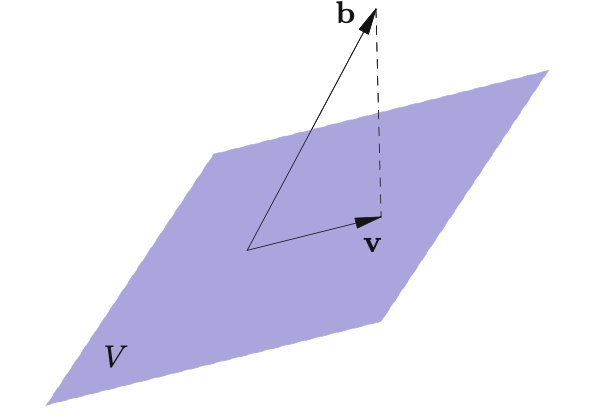
Key Concepts:

- Inner product and associated norm
- Gram matrix and its properties
- Normal equations
- Orthogonal projections

**Gram Matrix**

Definition: The Gram matrix is a symmetric, positive semi-definite matrix representing the inner products of a set of vectors. Given vectors $w_1, w_2, \dots, w_n$, the Gram matrix $K$ is:

$K_{ij} = \langle w_i, w_j \rangle$
    
Properties:

- Symmetric: $K_{ij} = K_{ji}$.
- Positive Semi-Definite: For any vector $x$, we have $x^T K x \geq 0$.
- Full Rank if Linearly Independent: If $w_1, \dots, w_n$ are linearly independent, $K$ is positive definite.

Application: In the closest point problem, the Gram matrix helps solve:
    $ Kx = f, \quad \text{where} \quad f_i = \langle w_i, b \rangle. $

**Theorem - Unique Closest Point**

Statement: Let $w_1, \dots, w_n$ form a basis for the subspace $W \subset \mathbb{R}^m$. Given $b \in \mathbb{R}^m$, the closest point $w^* \in W$ is unique and given by:

 $x^* = K^{-1} f$
where $K$ is the Gram matrix with entries $k_{ij} = \langle w_i, w_j \rangle$ and $f_i = \langle w_i, b \rangle$.

**Trivial Case: $b \in W$**


- If $b$ already belongs to the subspace $W$, the closest point is simply:

    $w^* = b$.
    
- In this case, the distance is:

    $||w^* - b|| = 0$. 
    
- The problem is only interesting when $b \notin W$.

**Minimize the squared distance**

Objective: Minimize the squared distance
$$
\left\lVert w - b \right\rVert ^2 = \langle w - b, w - b \rangle = \left\lVert w \right\rVert ^2 - 2\langle w, b \rangle + \left\lVert b \right\rVert ^2.
$$

   
Assumption: The subspace $W$ has a basis $w_1, \dots, w_n$ with $n = \dim W$. The most general vector in $W$ is:
$$    
      w = x_1 w_1 + \dots + x_n w_n.
$$

**Final Quadratic Formulation**

The squared distance function reduces to a quadratic function:
$$
          p(x) = x^T K x - 2 x^T f + c,
$$
where:

- $K$ is the Gram matrix with $k_{ij} = \langle w_i, w_j \rangle$.
- $f$ is the vector with $f_i = \langle w_i, b \rangle$.
- $c = \|b\|^2$.
    

**Theorem:** If $K$ is positive definite, then $p(x)$ has a unique minimizer:

\begin{equation*}
    x^* = K^{-1} f
\end{equation*}
Minimum value:
\begin{equation*}
    p(x^*) = c - f^T K^{-1} f
  \end{equation*}


**Theorem - Closest Point as Projection**

Statement: The closest point $w^*$ to $b$ in $W$ coincides with the orthogonal projection of $b$ onto $W$.
    
Formula:
$$
w^* = \sum_{i=1}^{n} \langle b, u_i \rangle u_i
$$
where $\{u_i\}$ is an orthonormal basis of $W$.


In [3]:
import numpy as np

# --- Step 1: Get vectors from user ---
# Each vector should be entered as space-separated numbers (e.g., "1 2 -1")

w1 = np.array(list(map(float, input("Enter vector w1 : ").split())))
w2 = np.array(list(map(float, input("Enter vector w2 : ").split())))
b = np.array(list(map(float, input("Enter vector b : ").split())))

# --- Step 2: Compute the Gram matrix K ---
# K_ij = <w_i, w_j> = dot product between w_i and w_j
K = np.array([
    [np.dot(w1, w1), np.dot(w1, w2)],
    [np.dot(w2, w1), np.dot(w2, w2)]
])

# --- Step 3: Compute the vector f ---
# f_i = <w_i, b>
f = np.array([np.dot(w1, b), np.dot(w2, b)])

# --- Step 4: Solve for x* ---
# Solve the linear system Kx = f
x_star = np.linalg.solve(K, f)

# --- Step 5: Compute the closest point w* ---
# w* = x1*w1 + x2*w2 = W @ x*
W = np.column_stack((w1, w2))  # make matrix with w1 and w2 as columns
w_star = W @ x_star

# --- Step 6: Compute the distance ---
# Distance between b and its projection w*
distance = np.linalg.norm(w_star - b)

# --- Step 7: Show results ---
print("\nGram Matrix (K):\n", K)
print("\nVector f:\n", f)
print("\nSolution x*:\n", x_star)
print("\nClosest Point w*:\n", w_star)
print("\nMinimum Distance ||w* - b|| = ", distance)


Enter vector w1 : 1 2 -1
Enter vector w2 : 2 -3 -1
Enter vector b : 1 0 0

Gram Matrix (K):
 [[ 6. -3.]
 [-3. 14.]]

Vector f:
 [1. 2.]

Solution x*:
 [0.26666667 0.2       ]

Closest Point w*:
 [ 0.66666667 -0.06666667 -0.46666667]

Minimum Distance ||w* - b|| =  0.5773502691896257


**Conclusion:**

- Closest point problems arise in many applications including least squares approximation.
- The problem reduces to solving a system of linear equations.
- If an orthonormal basis is available, the closest point can be found using projections.
